# Linear Regression

Linear regression is one of the most fundamental and widely used tools in statistical modeling and data analysis — especially in finance. It allows us to quantify and explain the relationship between one variable (typically a financial return or price) and one or more explanatory variables (such as market returns, interest rates, or volatility). In its simplest form, linear regression helps answer questions like: “How sensitive is a stock to the overall market?” or “To what extent do interest rates explain bond yield changes?”

By fitting a straight line to observed data, the linear regression model estimates how changes in the independent variable(s) influence the dependent variable. This makes it a powerful method for risk modeling, factor analysis, forecasting, and performance attribution — all of which are essential in asset management, portfolio construction, and financial research. In this chapter, we will build intuition for the model, understand how to estimate and interpret it, and explore its limitations and assumptions in the context of financial time series.

## Model specification

In the multiple linear regression model, we describe a dependent random variable $Y$ as a linear function of multiple independent variables $X_1, X_2, \dots, X_d$:

$$
Y = \alpha + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_d X_d + \varepsilon
$$

- $Y$: Dependent variable (e.g., asset return)
- $X_1, \dots, X_d$: Independent variables (e.g., market return, interest rate, volatility)
- $\beta_0$: Intercept term
- $\beta_1, \dots, \beta_d$: Slope coefficients
- $\varepsilon$: Error term

For a sample of $n$ observations, the model becomes:

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \dots + \beta_d x_{id} + \varepsilon_i \quad \text{for } i = 1, 2, \dots, n
$$

- $y_i$: Observed value of the dependent variable
- $x_{ij}$: Observed value of the $j$-th independent variable in observation $i$
- $\varepsilon_i$: Residual term for observation $i$

In matrix notation, the model can be written compactly as:

$$
\mathbf{Y} = \mathbf{X} \boldsymbol{\beta} + \boldsymbol{\varepsilon}
$$

Where:
- $\mathbf{Y}$ is an $n \times 1$ vector of dependent variable values
- $\mathbf{X}$ is an $n \times (d+1)$ matrix including a column of ones for the intercept
- $\boldsymbol{\beta}$ is a $(d+1) \times 1$ vector of coefficients
- $\boldsymbol{\varepsilon}$ is an $n \times 1$ vector of residuals

The OLS estimator minimizes the **sum of squared residuals**:

$$
\min_{\boldsymbol{\beta}} \sum_{i=1}^n (y_i - \hat{y}_i)^2
$$

And the solution is given by:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{Y}
$$

Predictions of the model for each observation are given by:

$$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_{i1} + \hat{\beta}_2 x_{i2} + \dots + \hat{\beta}_k x_{ik} \quad \text{for } i = 1, 2, \dots, n
$$

This framework allows us to study how multiple variables jointly explain variations in an outcome — a common setup in empirical asset pricing and financial econometrics.

### Understanding the Impact of Intercept and Slope

In a simple linear regression model, the **intercept** ($\beta_0$) and **slope** ($\beta_1$) determine the position and orientation of the regression line.

- The **intercept $\beta_0$** represents the expected value of the dependent variable $Y$ when the independent variable $X$ is zero. Changing the intercept shifts the entire regression line **up or down** without altering its slope. It captures any baseline effect or systematic component not explained by $X$.

- The **slope $\beta_1$** measures the sensitivity of $Y$ to changes in $X$. A higher slope implies that small changes in $X$ result in larger changes in $Y$, while a lower slope implies a weaker relationship. If $\beta_1 > 0$, the regression line slopes upward (positive relationship); if $\beta_1 < 0$, it slopes downward (negative relationship). Changing the slope **rotates** the regression line around the intercept.

These two parameters together define the best linear approximation of how $Y$ responds to $X$. Visually, they control the height and angle of the line that minimizes the sum of squared deviations from the observed data points.

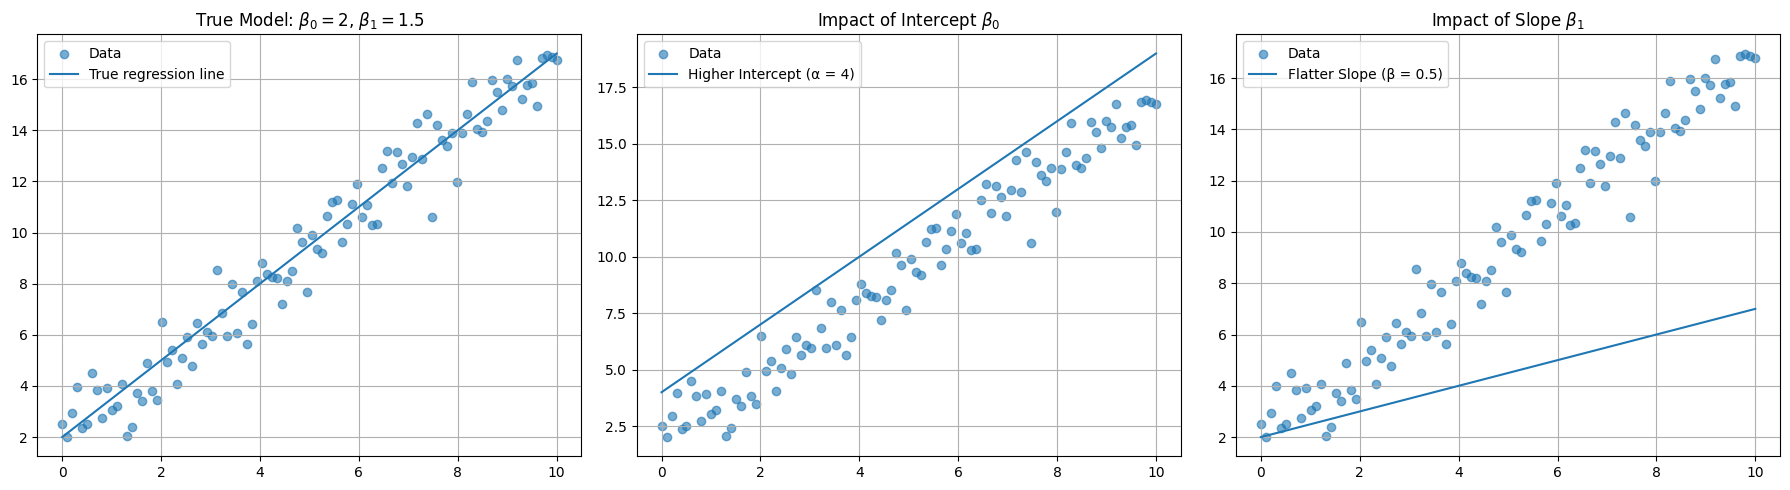

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Simulate data for univariate regression
n = 100
x = np.linspace(0, 10, n)
true_alpha = 2
true_beta = 1.5
noise = np.random.normal(0, 1, n)
y = true_alpha + true_beta * x + noise

# Create a DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Create plots to illustrate the impact of alpha and beta
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: true alpha and beta
axs[0].scatter(data['x'], data['y'], label='Data', alpha=0.6)
axs[0].plot(x, true_alpha + true_beta * x, label='True regression line')
axs[0].set_title(r'True Model: $\beta_0 = 2$, $\beta_1 = 1.5$')
axs[0].legend()
axs[0].grid(True)

# Plot 2: Change in alpha (intercept)
alpha_changed = 4
axs[1].scatter(data['x'], data['y'], label='Data', alpha=0.6)
axs[1].plot(x, alpha_changed + true_beta * x, label='Higher Intercept (α = 4)')
axs[1].set_title(r'Impact of Intercept $\beta_0$')
axs[1].legend()
axs[1].grid(True)

# Plot 3: Change in beta (slope)
beta_changed = 0.5
axs[2].scatter(data['x'], data['y'], label='Data', alpha=0.6)
axs[2].plot(x, true_alpha + beta_changed * x, label='Flatter Slope (β = 0.5)')
axs[2].set_title(r'Impact of Slope $\beta_1$')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

### Using Categorical Variables in Regression Models

In many financial and economic applications, some explanatory variables are **categorical** rather than numeric. Examples include:

- Asset type (e.g., stock, bond, crypto)
- Sector (e.g., tech, energy, financials)
- Rating category (e.g., AAA, BB, CCC)
- Country or region

Since regression models require **numerical inputs**, we incorporate categorical variables by converting them into **dummy variables** (also called indicator variables).

#### Dummy Variable Encoding

Suppose we have a categorical variable with three categories: `"Stock"`, `"Bond"`, and `"Crypto"`. We introduce two dummy variables:

- $D_1 = 1$ if the asset is a Bond, 0 otherwise
- $D_2 = 1$ if the asset is a Crypto, 0 otherwise

We **omit one category** (e.g., Stock) to avoid perfect multicollinearity. This omitted category becomes the **reference group**.

#### Regression Model with Categorical Variables

The model becomes:

$$
Y = \beta_0 + \beta_1 D_1 + \beta_2 D_2 + \varepsilon
$$

- $Y$: Dependent variable (e.g., return)
- $D_1$: Dummy for Bond
- $D_2$: Dummy for Crypto
- $\beta_0$: Mean return for the reference group (Stock)
- $\beta_1$: Difference in mean return between Bonds and Stocks
- $\beta_2$: Difference in mean return between Crypto and Stocks

Each coefficient measures the effect of being in that category **relative to the reference group**.

#### Interpretation

- If $\beta_1 = -0.01$, then bonds return on average 1% less than stocks.
- If $\beta_2 = 0.03$, then crypto returns are 3% higher than stocks on average.

This approach lets us include **qualitative information** in regression models, enabling comparisons across categories and testing for systematic differences between groups.

## Assumptions of the Linear Regression Model

To interpret the results of an ordinary least squares (OLS) regression correctly and ensure the validity of statistical inference (e.g., confidence intervals, p-values), certain assumptions must hold. These assumptions are typically stated in the context of the **population model**:

$$
Y = \beta_0 + \beta_1 X_1 + \dots + \beta_d X_d + \varepsilon
$$

### 1. **Linearity**
The relationship between the dependent variable $Y$ and the independent variables $X_1, \dots, X_d$ is **linear in parameters**. That is, the expected value of $Y$ is a linear function of the $X$'s:

$$
\mathbb{E}[Y | X_1, \dots, X_d] = \beta_0 + \beta_1 X_1 + \dots + \beta_d X_d
$$

Violation: Nonlinear patterns in data → model misspecification.

### 2. **Independence of Errors**
The error terms $\varepsilon_i$ are **independent** across observations.

Violation: Occurs with **autocorrelated data** (e.g., time series) → standard errors and test statistics become unreliable.

### 3. **Homoscedasticity (Constant Variance of Errors)**
The error term has **constant variance** for all levels of the independent variables:

$$
\text{Var}(\varepsilon_i | X_i) = \sigma^2
$$

Violation: **Heteroscedasticity** (e.g., volatility clustering in financial data) → OLS estimates are still unbiased, but no longer efficient; standard errors and p-values become unreliable.

### 4. **No Perfect Multicollinearity**
No independent variable is a **perfect linear combination** of the others.

Violation: The model cannot uniquely estimate coefficients → common when including all dummies from a categorical variable (dummy variable trap).

### 5. **Zero Conditional Mean of Errors**
The errors have **zero mean**, conditional on the independent variables:

$$
\mathbb{E}[\varepsilon_i | X_i] = 0
$$

Violation: If relevant variables are omitted or there’s measurement error, this assumption fails → OLS becomes **biased and inconsistent**.

### 6. **Normality of Errors** *(for inference only)*
The error terms $\varepsilon_i$ are **normally distributed**:

$$
\varepsilon_i \sim \mathcal{N}(0, \sigma^2)
$$

This is **not required** for OLS estimation, but it is important for:
- Hypothesis testing
- Constructing confidence intervals
- Small-sample inference

### Summary

| Assumption              | Affects Coefficient Estimates? | Affects Inference? |
|--------------------------|-------------------------------|--------------------|
| Linearity                | ✅ Yes                         | ✅ Yes             |
| Independence of Errors   | ✅ Yes                         | ✅ Yes             |
| Homoscedasticity         | ❌ No (bias)                   | ✅ Yes             |
| No Perfect Multicollinearity | ✅ Yes                  | ✅ Yes             |
| Zero Conditional Mean    | ✅ Yes (bias)                  | ✅ Yes             |
| Normality of Errors      | ❌ No                          | ✅ Yes (small n)   |

Understanding these assumptions is key to knowing **when OLS is trustworthy**, and when to consider alternatives like **robust standard errors**, **GARCH models**, or **nonlinear regressions**.

## Hypothesis Testing in Linear Regression: Is β Different from Zero?

In linear regression, we often want to test whether an individual explanatory variable $X_j$ has a statistically significant effect on the dependent variable $Y$. In other words, we want to test whether the coefficient $\beta_j$ is **different from zero**.

### The Hypotheses

We set up the following null and alternative hypotheses:

- **Null hypothesis** ($H_0$): $\beta_j = 0$ (no effect)
- **Alternative hypothesis** ($H_1$): $\beta_j \ne 0$ (some effect)

### The Test Statistic (t-Test)

We estimate the coefficient $\hat{\beta}_j$ and its **standard error** $\text{SE}(\hat{\beta}_j)$ from the data. Then we compute the **t-statistic**:

$$
t = \frac{\hat{\beta}_j - 0}{\text{SE}(\hat{\beta}_j)}
$$

This statistic tells us how many standard errors $\hat{\beta}_j$ is away from zero.

### Simulation: Understanding Standard Errors Through Repeated Sampling

To refresh your memory regarding standard errors, we use simulation. The simulation below demonstrates the concept of a **standard error** by repeatedly estimating the slope coefficient $\beta_1$ in a simple linear regression model across 1,000 independent samples. Each sample is generated from the same underlying data-generating process, where the true relationship between $X$ and $Y$ is linear with $\beta_1 = 1.5$ and some added random noise.

By estimating the regression model for each sample, we obtain a distribution of $\hat{\beta}_1$ values. This distribution reflects the **sampling variability** of the estimator — it shows how much $\hat{\beta}_1$ would fluctuate from sample to sample due to randomness in the data.

The **standard deviation of these 1,000 estimates** gives us the **empirical standard error** of $\hat{\beta}$. This matches the theoretical idea of a standard error: a measure of **uncertainty around our estimate**.

Your take away should be:
- Even if the true $\beta$ is fixed, different samples will yield different estimates.
- The standard error plays a central role in hypothesis testing, confidence intervals, and assessing the reliability of regression coefficients.

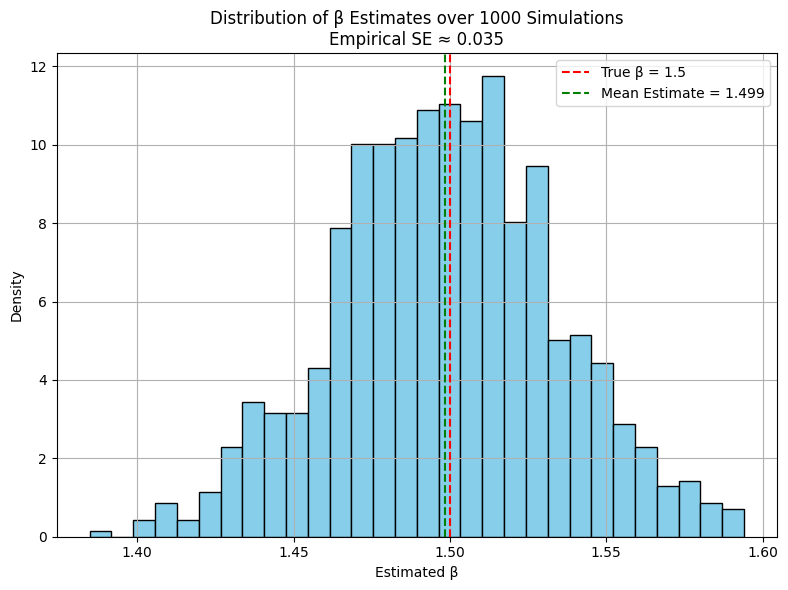

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set parameters for the simulation
n_simulations = 1000
n_obs = 100
true_alpha = 2
true_beta = 1.5
sigma = 1.0

# Store estimated betas
beta_estimates = []

# Run the simulation
np.random.seed(42)
for _ in range(n_simulations):
    x = np.random.uniform(0, 10, n_obs)
    noise = np.random.normal(0, sigma, n_obs)
    y = true_alpha + true_beta * x + noise

    # Estimate regression model
    X = sm.add_constant(x)  # Adds intercept term
    model = sm.OLS(y, X).fit()
    beta_estimates.append(model.params[1])  # Extract the slope estimate (beta)

# Convert to NumPy array for analysis
beta_estimates = np.array(beta_estimates)

# Calculate empirical standard error of beta estimates
empirical_se = np.std(beta_estimates)
mean_beta = np.mean(beta_estimates)

# Plot histogram of beta estimates
plt.figure(figsize=(8, 6))
plt.hist(beta_estimates, bins=30, color='skyblue', edgecolor='black', density=True)
plt.axvline(true_beta, color='red', linestyle='--', label=f"True β = {true_beta}")
plt.axvline(mean_beta, color='green', linestyle='--', label=f"Mean Estimate = {mean_beta:.3f}")
plt.title(f"Distribution of β Estimates over {n_simulations} Simulations\nEmpirical SE ≈ {empirical_se:.3f}")
plt.xlabel("Estimated β")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Decision Rule

- Compare the $t$-statistic to a **critical value** from the $t$-distribution (based on degrees of freedom).
- Or compute the **p-value**, which is the probability of observing a $t$-statistic this extreme under the null hypothesis.
- **Reject $H_0$** if the p-value is below a chosen significance level (e.g., 0.05).

### Why Standard Errors Matter

- The standard error reflects the **uncertainty** in the estimate $\hat{\beta}_j$.
- If your standard errors are **too small** (e.g., due to violated assumptions like homoscedasticity), your t-statistics will be **inflated** → leading to **false positives** (Type I errors).
- If standard errors are **too large**, you may fail to detect real effects (Type II errors).

### Interpretation

- A statistically significant $\hat{\beta}_j$ (p < 0.05) means we have **evidence that $X_j$ matters** for predicting $Y$.
- A non-significant result suggests the effect is **not distinguishable from zero**, given the noise in the data.

## Goodness of Fit in Linear Regression

The **goodness of fit** of a linear regression model refers to how well the model explains the variation in the dependent variable $Y$. In other words, it measures how closely the predicted values $\hat{y}_i$ match the actual observations $y_i$.

The most common measure of goodness of fit is the **coefficient of determination**, also known as **R-squared** ($R^2$).

### Definition of R-squared

$$
R^2 = 1 - \frac{\text{SSR}}{\text{SST}}
$$

Where:
- **SSR** (Sum of Squared Residuals): $\sum_{i=1}^n (y_i - \hat{y}_i)^2$
- **SST** (Total Sum of Squares): $\sum_{i=1}^n (y_i - \bar{y})^2$

### Interpretation

- $R^2 = 0$: The model explains none of the variation in $Y$.
- $R^2 = 1$: The model explains all of the variation in $Y$.
- Values between 0 and 1 show the **proportion of variance** in $Y$ explained by the independent variables.

For example, $R^2 = 0.85$ means that 85% of the variation in the dependent variable can be explained by the model.

The figure below shows you two examples. If you take a look at the deviations from data points to the black dashed line (the arithmetic mean of $y$), this is to what the SST refers to. In comparison, the lower the deviations from the points to the red line (which is SSR), the more variation of $y$ is explained by the model and the higher is $R^2$.

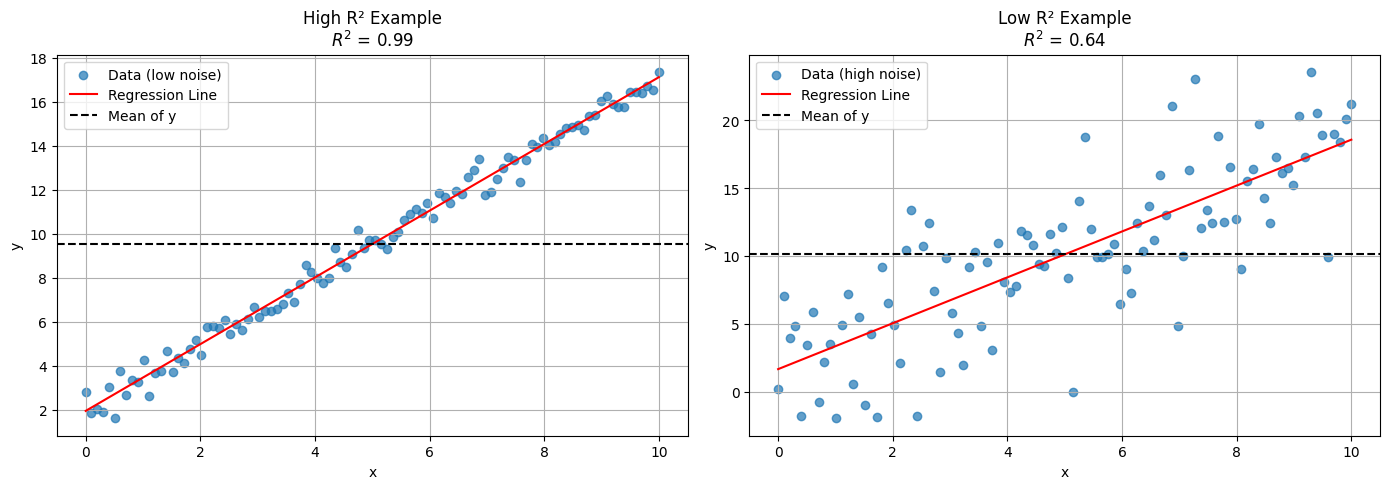

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(1)

n = 100
x = np.linspace(0, 10, n)
true_alpha = 2
true_beta = 1.5

# Low noise (high R²)
noise_low = np.random.normal(0, 0.5, n)
y_low = true_alpha + true_beta * x + noise_low
X_low = sm.add_constant(x)
model_low = sm.OLS(y_low, X_low).fit()
r2_low = model_low.rsquared
mean_y_low = np.mean(y_low)

# High noise (low R²)
noise_high = np.random.normal(0, 4, n)
y_high = true_alpha + true_beta * x + noise_high
X_high = sm.add_constant(x)
model_high = sm.OLS(y_high, X_high).fit()
r2_high = model_high.rsquared
mean_y_high = np.mean(y_high)

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Left: High R²
axs[0].scatter(x, y_low, label='Data (low noise)', alpha=0.7)
axs[0].plot(x, model_low.predict(X_low), color='red', label='Regression Line')
axs[0].axhline(mean_y_low, color='black', linestyle='--', label='Mean of y')
axs[0].set_title(f'High R² Example\n$R^2$ = {r2_low:.2f}')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].grid(True)

# Right: Low R²
axs[1].scatter(x, y_high, label='Data (high noise)', alpha=0.7)
axs[1].plot(x, model_high.predict(X_high), color='red', label='Regression Line')
axs[1].axhline(mean_y_high, color='black', linestyle='--', label='Mean of y')
axs[1].set_title(f'Low R² Example\n$R^2$ = {r2_high:.2f}')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Important Notes

- A **high $R^2$ does not guarantee a good model** — it could still be misspecified or suffer from overfitting.
- Adding more variables to the model **never decreases $R^2$**, even if the new variables are irrelevant.
- To adjust for this, we use **adjusted R-squared**, which penalizes model complexity:

$$
\bar{R}^2 = 1 - \left( \frac{\text{SSR} / (n - d - 1)}{\text{SST} / (n - 1)} \right)
$$

Where $k$ is the number of explanatory variables (excluding the intercept), and $n$ is the number of observations.

### Summary

$R^2$ provides an intuitive measure of model performance, but it should be interpreted **alongside other diagnostics** like residual plots, statistical significance of coefficients, and tests for model assumptions.

## Cross-Sectional vs. Time-Series Regression

In empirical finance and economics, regression models can be applied to different types of data structures — most commonly **cross-sectional** and **time-series** data. While the mathematical form of a regression model is similar in both settings, the interpretation and assumptions differ significantly.

### Cross-Sectional Regression

- **Data structure**: Multiple entities (e.g., firms, assets, countries) observed at a single point in time.
- **Goal**: Explain differences **across units**.
- **Example**: Regress stock returns on firm characteristics (size, value, momentum) in a given month.
- **Assumptions**: Observations are **independent** across units.
- **Common use**: Asset pricing tests (e.g., Fama-MacBeth), cross-sectional risk premia analysis.

### Time-Series Regression

- **Data structure**: A single entity observed over **multiple time periods**.
- **Goal**: Model dynamics or predict the future based on past information.
- **Example**: Regress a stock's return on past market returns or macro variables.
- **Assumptions**: Observations are ordered and possibly **serially correlated** over time.
- **Common use**: Return prediction, volatility modeling, macro-finance analysis.

### Key Differences

| Feature                  | Cross-Sectional                  | Time-Series                      |
|--------------------------|----------------------------------|----------------------------------|
| What varies              | Entities (at one time)           | Time (for one entity)            |
| Independence assumption  | Across entities                  | Across time (harder to satisfy)  |
| Goal                     | Explain variation across units   | Model evolution over time        |
| Examples                 | Stock returns vs. firm size      | Stock returns vs. lagged market  |
| Key concern              | Omitted variable bias            | Autocorrelation, stationarity    |

Understanding the type of regression you're working with helps determine the right modeling approach, which assumptions need to be checked, and how to interpret the results in context.

## Time-Series Regression: Company Return on Market Return (CAPM)

One of the most widely used time-series regressions in finance is the **Capital Asset Pricing Model (CAPM)** regression. In this model, the return of a single company (or asset) is regressed on the return of the overall market index:

$$
R_{i,t} - R_{f,t}  = \alpha_i + \beta_i R_{m,t} + \varepsilon_t
$$

- $R_{i,t}$: Return of asset or company $i$ at time $t$
- $R_{f,t}$: Risk-free rate
- $R_{m,t}$: Return of the market (e.g., S&P 500) at time $t$
- $\beta_i$: **Market beta** — a measure of how sensitive the asset is to market movements
- $\alpha_i$: **Jensen's alpha** — the average return unexplained by market exposure (i.e., potential outperformance)
- $\varepsilon_t$: Error term (idiosyncratic return)

Note that $\beta_0$ is replaced by $\alpha$ only due to naming conventions in this scientific area. This regression is estimated using **time-series data** (e.g., daily, weekly, or monthly returns). The coefficient $\beta_i$ plays a central role in risk management and portfolio construction, as it captures the asset’s **systematic risk**. A $\beta > 1$ indicates that the stock tends to amplify market movements, while $\beta < 1$ suggests a more defensive behavior.

This model is foundational in empirical asset pricing and is frequently used to evaluate fund performance, estimate cost of capital, or measure exposure to systematic risk.

### What about the risk-free rate? 
- The risk-free rate represents the return with zero market exposure.
- Subtracting it aligns the model with investors’ decisions: they choose how much return they want to earn above the risk-free rate by taking on different types of risk.
- This makes $\alpha$ and $\beta$ easier to interpret in terms of compensation for risk.

When you’re using daily or monthly data, it’s common to approximate $R_f$ as zero if:
- The risk-free rate is very low (e.g., T-bill yield near 0%)
- Or you’re focusing on short-term, simplified regressions

But in formal analysis (especially with Fama-French data), you should always subtract $R_f$ from both the asset and market returns.

The code below regresses Apple's return on the Fama-French market portfolio using daily return data since 2015. The $\beta \approx 1.15$ signals that Apple react's sensitive to the market. Furthermore, the intercept $\alpha$ has a very small value and according to the statistical test, we would not reject the hypothesis of $H_0: \alpha = 0$ at a significance level of $5\%$. The $R^2 \approx 0.55$ tells us that the market portfolio is able to explain more than half of the variation of Apple's daily returns. 

In [4]:
from utils import get_ff_factors
import yfinance as yf 
import pandas as pd
import statsmodels.api as sm

try:
    factors = pd.read_csv("../data/chapter_05/ff_data.csv")
    factors["date"] = pd.to_datetime(factors["date"])
    factors.set_index("date", inplace = True)

    factors_monthly = pd.read_csv("../data/chapter_05/ff_data_monthly.csv")
    factors_monthly["date"] = pd.to_datetime(factors_monthly["date"], format="%Y-%m")
    factors_monthly.set_index("date", inplace = True)
    factors_monthly.index = factors_monthly.index.to_period("M")
except:
    factors = get_ff_factors()
    factors.to_csv("../data/chapter_05/ff_data.csv")
    factors_monthly = get_ff_factors(frequency="monthly")
    factors_monthly.to_csv("../data/chapter_05/ff_data_monthly.csv")
    
try:
    data = pd.read_csv("../data/chapter_05/apple_data.csv")
    data["Date"] = pd.to_datetime(data["Date"])
    data.set_index("Date", inplace = True)
except:
    data = yf.download("AAPL", start = "2015-01-01")
    data.columns = data.columns.get_level_values(0)
    data.to_csv("../data/chapter_05/apple_data.csv")

daily_returns = data.loc[:, ["Close"]].pct_change().dropna()
monthly_returns = data.resample("ME").last().loc[:, ["Close"]].pct_change().dropna()
monthly_returns.index = monthly_returns.index.to_period("M")

df = pd.merge(daily_returns, factors, left_index = True, right_index = True)
df["excess_return"] = df["Close"] - df["RF"]

df_monthly = pd.merge(monthly_returns, factors_monthly, left_index = True, right_index = True)
df_monthly["excess_return"] = df_monthly["Close"] - df_monthly["RF"]

X_capm = sm.add_constant(df.loc[:, ["Mkt-RF"]])
X_three = sm.add_constant(df.loc[:, ["Mkt-RF", "SMB", "HML"]])
y = df["excess_return"]

X_capm_monthly = sm.add_constant(df_monthly.loc[:, ["Mkt-RF"]])
X_three_monthly = sm.add_constant(df_monthly.loc[:, ["Mkt-RF", "SMB", "HML"]])
y_monthly = df_monthly["excess_return"]

capm = sm.OLS(y, X_capm).fit()
print(capm.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     3049.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:34:08   Log-Likelihood:                 7544.4
No. Observations:                2515   AIC:                        -1.508e+04
Df Residuals:                    2513   BIC:                        -1.507e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.949      0.0

Using different frequencies such as daily, weekly or monthly can impact the analysis. In the cell below, we conduct the same regression analysis, however, using monthly return data. This reduces the number of observations from $2,515$ to $119$. While the estimates for $\alpha$ and $\beta$ only differ slightly to the daily estimates, the standard errors are larger, reflecting greater statistical uncertainty for these estimates.

In [5]:
capm_monthly = sm.OLS(y_monthly, X_capm_monthly).fit()
print(capm_monthly.summary())


                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     100.1
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           2.14e-17
Time:                        08:34:08   Log-Likelihood:                 169.02
No. Observations:                 119   AIC:                            -334.0
Df Residuals:                     117   BIC:                            -328.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0090      0.006      1.628      0.1

### Extending the CAPM: Multi-Factor Models

While the CAPM provides a simple and elegant framework for modeling asset returns based on market risk, empirical evidence has shown that **market return alone does not fully explain the cross-section of stock returns**. Certain types of stocks — such as small-cap or value stocks — have been observed to earn systematically higher returns than predicted by CAPM.

To address these patterns, researchers have extended the CAPM into **multi-factor models**, where additional risk factors are included as explanatory variables in the regression. A popular example is the Fama-French extension which includes two additional risk factors $SMB$ and $HLM$:

$$
R_{i,t} - R_{f,t}  = \alpha_i + \beta_m R_{m,t} + \beta_s \cdot \text{SMB}_t + \beta_h \cdot \text{HML}_t  + \varepsilon_t
$$

- $\text{SMB}_t$ (Small Minus Big): The return difference between small-cap and large-cap portfolios
- $\text{HML}_t$ (Small Minus Big): The return difference between small-cap and large-cap portfolios
- $\beta_s$: Measures the asset's **exposure to the size factor**
- $\beta_h$: Measures the asset's **exposure to the high minus low factor**
- Other factors can be added as well (e.g., momentum, profitability)

This extended framework is part of the **Fama-French factor models**, which are widely used in empirical asset pricing and portfolio evaluation. Each additional factor aims to capture a **systematic source of risk or behavioral bias** not explained by the market alone.

By including these factors in a time-series regression, we can better understand the **drivers of asset returns**, assess **risk exposures**, and improve **performance attribution** in asset management.

### How Risk Factors Are Constructed

The additional risk factors used in multi-factor models — such as **Size (SMB)**, **Value (HML)**, and others — are typically constructed from **portfolio-sorting strategies** based on firm characteristics.

#### Example: Constructing the SMB (Size) Factor

- Firms are sorted into **small-cap** and **large-cap** groups based on their market capitalization.
- Portfolios are formed by going **long small-cap stocks** and **short large-cap stocks**.
- The daily or monthly return difference between these two portfolios defines the **SMB (Small Minus Big)** factor:

$$
\text{SMB}_t = R_{\text{Small}, t} - R_{\text{Big}, t}
$$

#### Example: Constructing the HML (Value) Factor

- Firms are sorted based on their **book-to-market ratios** (a measure of "value").
- Portfolios are created by going **long high book-to-market (value) stocks** and **short low book-to-market (growth) stocks**.
- The return difference becomes the **HML (High Minus Low)** factor:

$$
\text{HML}_t = R_{\text{High B/M}, t} - R_{\text{Low B/M}, t}
$$

These factors are meant to capture **compensated sources of systematic risk** — that is, risks that investors require a premium to bear. They are available from academic databases (e.g., Kenneth French’s data library) and are widely used in both academic research and professional asset management.

###  Interpreting Negative Fama-French Factor Betas

The cell below shows results for the regression of Apple's daily returns on the three risk factors using data since 2015. The estimate for $\beta_m$ is similar as for the single risk factor model from before. $\hat{\beta}_s$ and $\hat{\beta}_h$ are both negative. 

####  Negative Beta on SMB (Size Factor)

- **SMB (Small Minus Big)** captures the return spread between small-cap and large-cap stocks.
- A **negative beta** on SMB implies the asset behaves more like a **large-cap stock**.
- When small caps outperform, this asset tends to underperform, and vice versa.

Interpretation:
> The asset has a **tilt toward large-cap characteristics**, and it is **negatively exposed to the size premium**.

#### Negative Beta on HML (Value Factor)

- **HML (High Minus Low)** captures the return spread between value (high book-to-market) and growth (low book-to-market) stocks.
- A **negative beta** on HML implies the asset behaves more like a **growth stock**.
- When value stocks do well, this asset tends to do worse.

Interpretation:
> The asset has a **growth tilt** and is **negatively exposed to the value premium**.

Negative betas on these factors are common in **large-cap growth stocks**, such as major tech companies. These exposures help investors understand how an asset might perform relative to broader market and style trends.

As for the single risk factor model, the beta coefficients seem to be statistically significantly different from zero. This is not the case for $\alpha$ which implies that the expected return of Apple's return is only driven by its exposure to systematic risk factors (we deep dive into this later). The coefficient of determination increases in comparison to the single risk factor model which demonstrates the benefit of including risk factors other than the market portfolio. 

In [6]:
fama_french = sm.OLS(y, X_three).fit()
print(fama_french.summary())

                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     1262.
Date:                Wed, 30 Apr 2025   Prob (F-statistic):               0.00
Time:                        08:34:08   Log-Likelihood:                 7701.5
No. Observations:                2515   AIC:                        -1.540e+04
Df Residuals:                    2511   BIC:                        -1.537e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.792      0.0

In analogy to before, we conduct the same analysis with monthly data. Hereby, we would not reject $H_0: \beta_s = 0$. This is due to the smaller estimate for the coefficient and the increases standard error. 

In [7]:
fama_french_monthly = sm.OLS(y_monthly, X_three_monthly).fit()
print(fama_french_monthly.summary())


                            OLS Regression Results                            
Dep. Variable:          excess_return   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     42.98
Date:                Wed, 30 Apr 2025   Prob (F-statistic):           1.05e-18
Time:                        08:34:08   Log-Likelihood:                 177.00
No. Observations:                 119   AIC:                            -346.0
Df Residuals:                     115   BIC:                            -334.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0076      0.005      1.439      0.1

### Daily vs. Monthly Data in Time-Series Regressions

When estimating factor models such as the Fama-French regression, the choice between **daily** and **monthly** data involves a trade-off between **sample size**, **noise**, and **economic interpretation**.

#### Daily Data
- **Pros**:
  - Provides a **larger number of observations**, improving statistical power.
  - Captures **short-term dynamics** and **high-frequency behavior**.
- **Cons**:
  - More **market microstructure noise** (e.g., bid-ask bounce, asynchronous trading).
  - Factor exposures may be **less stable day-to-day**.
  - More susceptible to **outliers** and **event-driven volatility**.

#### Monthly Data
- **Pros**:
  - Reduces noise and smooths out short-term fluctuations.
  - More consistent with the **economic meaning of risk premia**, which are often long-term.
  - Suitable for studies of **style performance** (e.g., size, value).
- **Cons**:
  - **Fewer observations**, which can lead to less precise estimates.
  - Misses high-frequency behavior and **intra-month variation**.


#### Summary

| Criterion         | Daily Data             | Monthly Data          |
|------------------|------------------------|-----------------------|
| Observations     | Many (high frequency)  | Fewer (low frequency) |
| Noise            | Higher                 | Lower                 |
| Interpretability | Short-term focus       | Long-term style exposure |
| Common use cases | Trading models, volatility | Asset pricing, performance attribution |

The best choice depends on your **research goal**: use **daily data** for fine-grained analysis or short-term risk, and **monthly data** for understanding long-term factor exposures.

### Estimating Expected Returns with CAPM and Fama-French Models

The CAPM and Fama-French models can be used not just to explain historical returns, but also to **estimate expected returns** based on an asset’s **exposure to systematic risk factors**.

#### CAPM Expected Return

Under the Capital Asset Pricing Model (CAPM), the expected return of an asset is:

$$
\mathbb{E}[R_i] = R_f + \beta_i \cdot \left( \mathbb{E}[R_m] - R_f \right)
$$

- $R_f$: Risk-free rate
- $\mathbb{E}[R_m]$: Expected market return
- $\beta_i$: Market beta of the asset

This formula shows that expected return increases with **market risk exposure**. An asset with $\beta = 1$ is expected to earn the market risk premium; a higher-beta asset earns more (and vice versa).

#### Fama-French 3-Factor Model

The Fama-French model extends this to include exposures to **size (SMB)** and **value (HML)** factors:

$$
\mathbb{E}[R_i] = R_f + \beta_m \cdot \left( \mathbb{E}[R_m] - R_f \right) + \beta_s \cdot \mathbb{E}[SMB] + \beta_h \cdot \mathbb{E}[HML]
$$

- $\beta_s$: Exposure to the size factor (SMB)
- $\beta_h$: Exposure to the value factor (HML)
- $\mathbb{E}[SMB]$, $\mathbb{E}[HML]$: Expected returns of size and value factors

Each term contributes to the expected return based on **how sensitive the asset is to each risk factor**, and **how well-compensated that risk is** in the market.

These models help estimate **fair returns** for an asset given its risk exposures. Deviations from these expected returns may indicate **mispricing**, **alpha**, or **model limitations**.

If we compare the estimates for the expected return for our example, we know have three options. The annualized expected return based on historical daily returns is equal to:

In [8]:
print(f"Annual expected return based on historical daily returns: {daily_returns.mean()["Close"]*252:.4f}") 

Annual expected return based on historical daily returns: 0.2413


When we determine, the expected returns with the formulas provided above, we observe a large discrepancy:

In [9]:
e_capm = factors["RF"].mean() + capm.params["Mkt-RF"] * factors["Mkt-RF"].mean()
e_ff = factors["RF"].mean() + fama_french.params["Mkt-RF"] * factors["Mkt-RF"].mean() + fama_french.params["SMB"] * factors["SMB"].mean() + fama_french.params["HML"] * factors["HML"].mean()

print(f"Annual expected return based on historical data and the CAPM: {e_capm*252:.4f}") 
print(f"Annual expected return based on historical data and the three factor Fama-French model: {e_ff*252:.4f}") 

Annual expected return based on historical data and the CAPM: 0.1199
Annual expected return based on historical data and the three factor Fama-French model: 0.1036


The discrepancy stems from ommitting $\alpha$. If we include its empirical estimate, the following expected return estimates result:

In [10]:
e_capm = factors["RF"].mean() + capm.params["const"] + capm.params["Mkt-RF"] * factors["Mkt-RF"].mean()
e_ff = factors["RF"].mean() + fama_french.params["const"] + fama_french.params["Mkt-RF"] * factors["Mkt-RF"].mean() + fama_french.params["SMB"] * factors["SMB"].mean() + fama_french.params["HML"] * factors["HML"].mean()

print(f"Annual expected return based on historical data and the CAPM: {e_capm*252:.4f}") 
print(f"Annual expected return based on historical data and the three factor Fama-French model: {e_ff*252:.4f}") 

Annual expected return based on historical data and the CAPM: 0.2380
Annual expected return based on historical data and the three factor Fama-French model: 0.2057



### The Role of Alpha in Expected Return Estimation

Wether to include or not to include the empirical estimate of $\alpha$, comes with a discussion. When using the CAPM or Fama-French model to estimate expected returns, a key question is whether or not to include the **intercept term $\alpha$**.

#### Theoretical Perspective

From a theoretical standpoint, **asset pricing models assume markets are efficient**, and all expected returns are determined by **exposure to systematic risk factors**. This implies:

$$
\alpha = 0
$$

- The **intercept** captures the portion of the return **not explained by the factors**.
- In the **theory**, all pricing errors (alphas) should average out to zero over time.
- Setting $\alpha = 0$ aligns the model with its **purpose as a benchmark for fair compensation**.

#### Empirical Perspective

In practice, when we estimate these models using time-series regressions, we do often observe non-zero $\alpha$ values:

- If **$\alpha > 0$**, the asset earned more than predicted → "abnormal return"
- But this $\alpha$ is **sample-dependent** and often **not statistically significant**

So while $\hat{\alpha}$ may improve the fit to **historical returns**, it doesn’t necessarily improve the **predictive power** of the model.

#### Practical Trade-Off

- **Including $\alpha$** improves fit and aligns better with observed returns, but it treats past outperformance as **persistent**, which may be optimistic or spurious.
- **Setting $\alpha = 0$** reflects theoretical discipline and avoids **overfitting**, but may **underestimate historical returns** — especially for assets that have had unusually high past performance.

> Whether to include $\alpha$ depends on the goal:
> - For **forecasting expected returns based on risk exposures**, setting $\alpha = 0$ is justified and theoretically consistent.
> - For **performance attribution or benchmarking**, reporting $\hat{\alpha}$ provides insight into past unexplained return.

Understanding this distinction helps students see **why models are useful** even if they don’t perfectly fit history — and why careful interpretation of regression outputs matters.

### Systematic vs. Idiosyncratic Risk

Factor models also allow to derive a disticntion of total risk into two main components: **systematic risk** and **idiosyncratic risk**.

#### Systematic Risk (Market or Factor Risk)

- This is the portion of an asset's return variability that is explained by **common risk factors**.
- Examples include overall market movements, interest rate shifts, inflation surprises, or exposure to factors like size or value.
- It is **non-diversifiable** — even well-diversified portfolios are exposed to systematic risk.
- In models like CAPM or Fama-French, systematic risk is captured by the **factor betas**:
  
$$
\text{Systematic Risk} = \beta_1 F_1 + \beta_2 F_2 + \dots
$$

#### Idiosyncratic Risk (Asset-Specific Risk)

- This is the part of an asset’s return that is **unique to the firm** and not explained by common factors.
- Examples include firm-specific news, management changes, earnings surprises, or lawsuits.
- It is **diversifiable** — in a well-constructed portfolio, these risks tend to cancel out.
- In regression models, idiosyncratic risk is represented by the **residuals**:

  $$
  \text{Idiosyncratic Risk} = \varepsilon_t
  $$

#### Why This Matters

- Investors are only compensated for **systematic risk**, because idiosyncratic risk can be eliminated through diversification.
- Understanding this distinction helps explain **why correlations arise** between similar assets: they share exposure to the same systematic factors.
- It also highlights the role of **factor models** in separating meaningful (priced) risk from noise.<>

### Intuition: Why Firms with Similar Risk Exposures Have Correlated Returns

In multi-factor models like the CAPM or Fama-French models, an asset’s return is largely driven by its **exposure to common risk factors**:

$$
R_{i,t} = \alpha_i + \beta_{i1} F_{1,t} + \beta_{i2} F_{2,t} + \dots + \varepsilon_{i,t}
$$

If two companies have **similar betas** — that is, they respond similarly to the same risk factors — their returns will tend to move together because:

- They are both influenced by the **same systematic shocks** (e.g., a market downturn, small-cap rally, value rebound).
- Their **idiosyncratic (residual) components** may differ, but the **factor-driven component** dominates in most periods.

#### Intuition:

> Think of factor exposures as **risk "DNA"** — when two companies share the same DNA, they react similarly to changes in the environment.

For example:
- Two small-cap value stocks will likely both benefit when value stocks perform well.
- A large-cap growth tech stock and a small-cap cyclical industrial will react **differently** to the same macro environment.

#### Resulting Correlation

- Returns of firms with **similar factor loadings** will have **high correlation**, even if their industries differ.
- Conversely, firms with **dissimilar factor exposures** may have **low or even negative correlation**.

This is why **factor models are also useful for explaining correlation patterns** across assets, not just expected returns.

### Wrapping Up: From Factor Models to Time Series Analysis

In this chapter, we explored the use of linear regression models in financial applications, with a focus on explaining asset returns using systematic risk factors such as market, size, and value. We discussed how to interpret regression coefficients, assess model fit, and distinguish between systematic and idiosyncratic sources of return variation. We also examined the trade-offs involved in data frequency, the role of alpha, and the theoretical underpinnings of expected return estimation.

While these models provide powerful tools for understanding the drivers of returns, they typically treat time as just another variable. However, financial data are inherently **ordered over time**, and often exhibit patterns like autocorrelation, trends, and volatility clustering that standard regression models don’t capture.

In the next chapter, we shift our focus from static relationships to **dynamic behavior over time**. We’ll introduce key concepts from **time series analysis**, such as stationarity, autocorrelation, lag structures, and volatility modeling. These tools allow us to better understand, model, and forecast the evolution of financial variables — from prices and returns to interest rates and volatility indices.